# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Level 1 annotation of main cell types

In [2]:
timepoint <- "T2"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_83_84/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.rds")))

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.csv")))

Rows: 23290 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


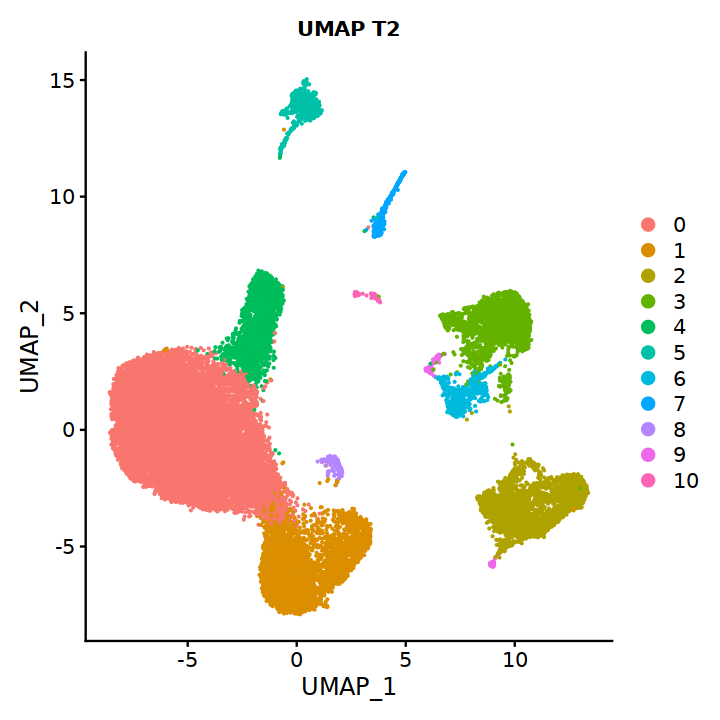

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [7]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B","ANXA1","GZMK","FOXP3")

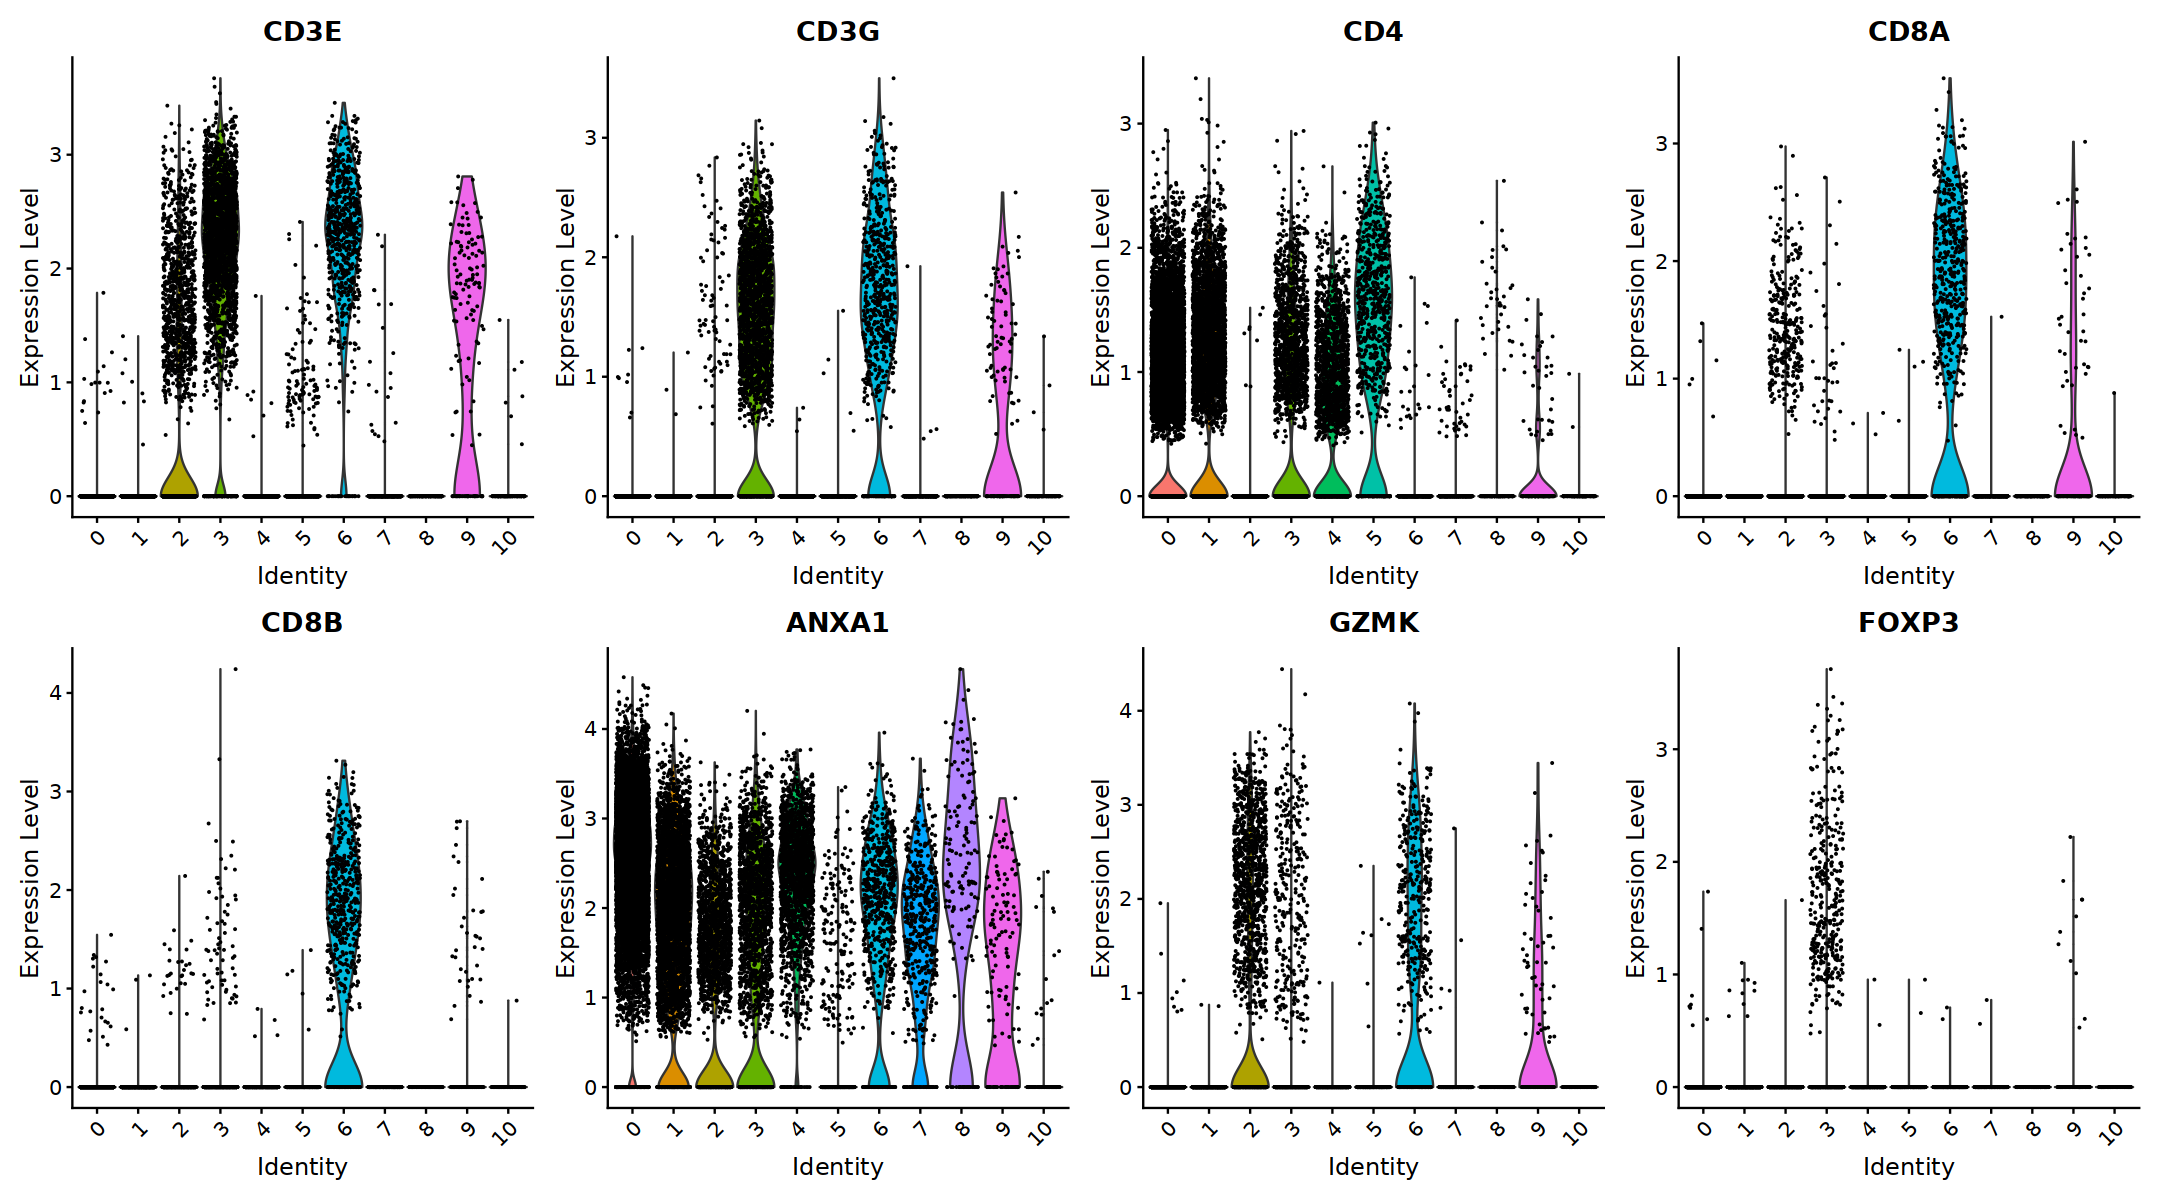

In [8]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Natural Killers

In [9]:
markers = c("NCAM1", "FCGR3A", "CX3CR1", "GNLY", "KLRC2", "KLRD1", "KLRC3", "KLRK1", "KLRC1", "GNLY", "NKG7")

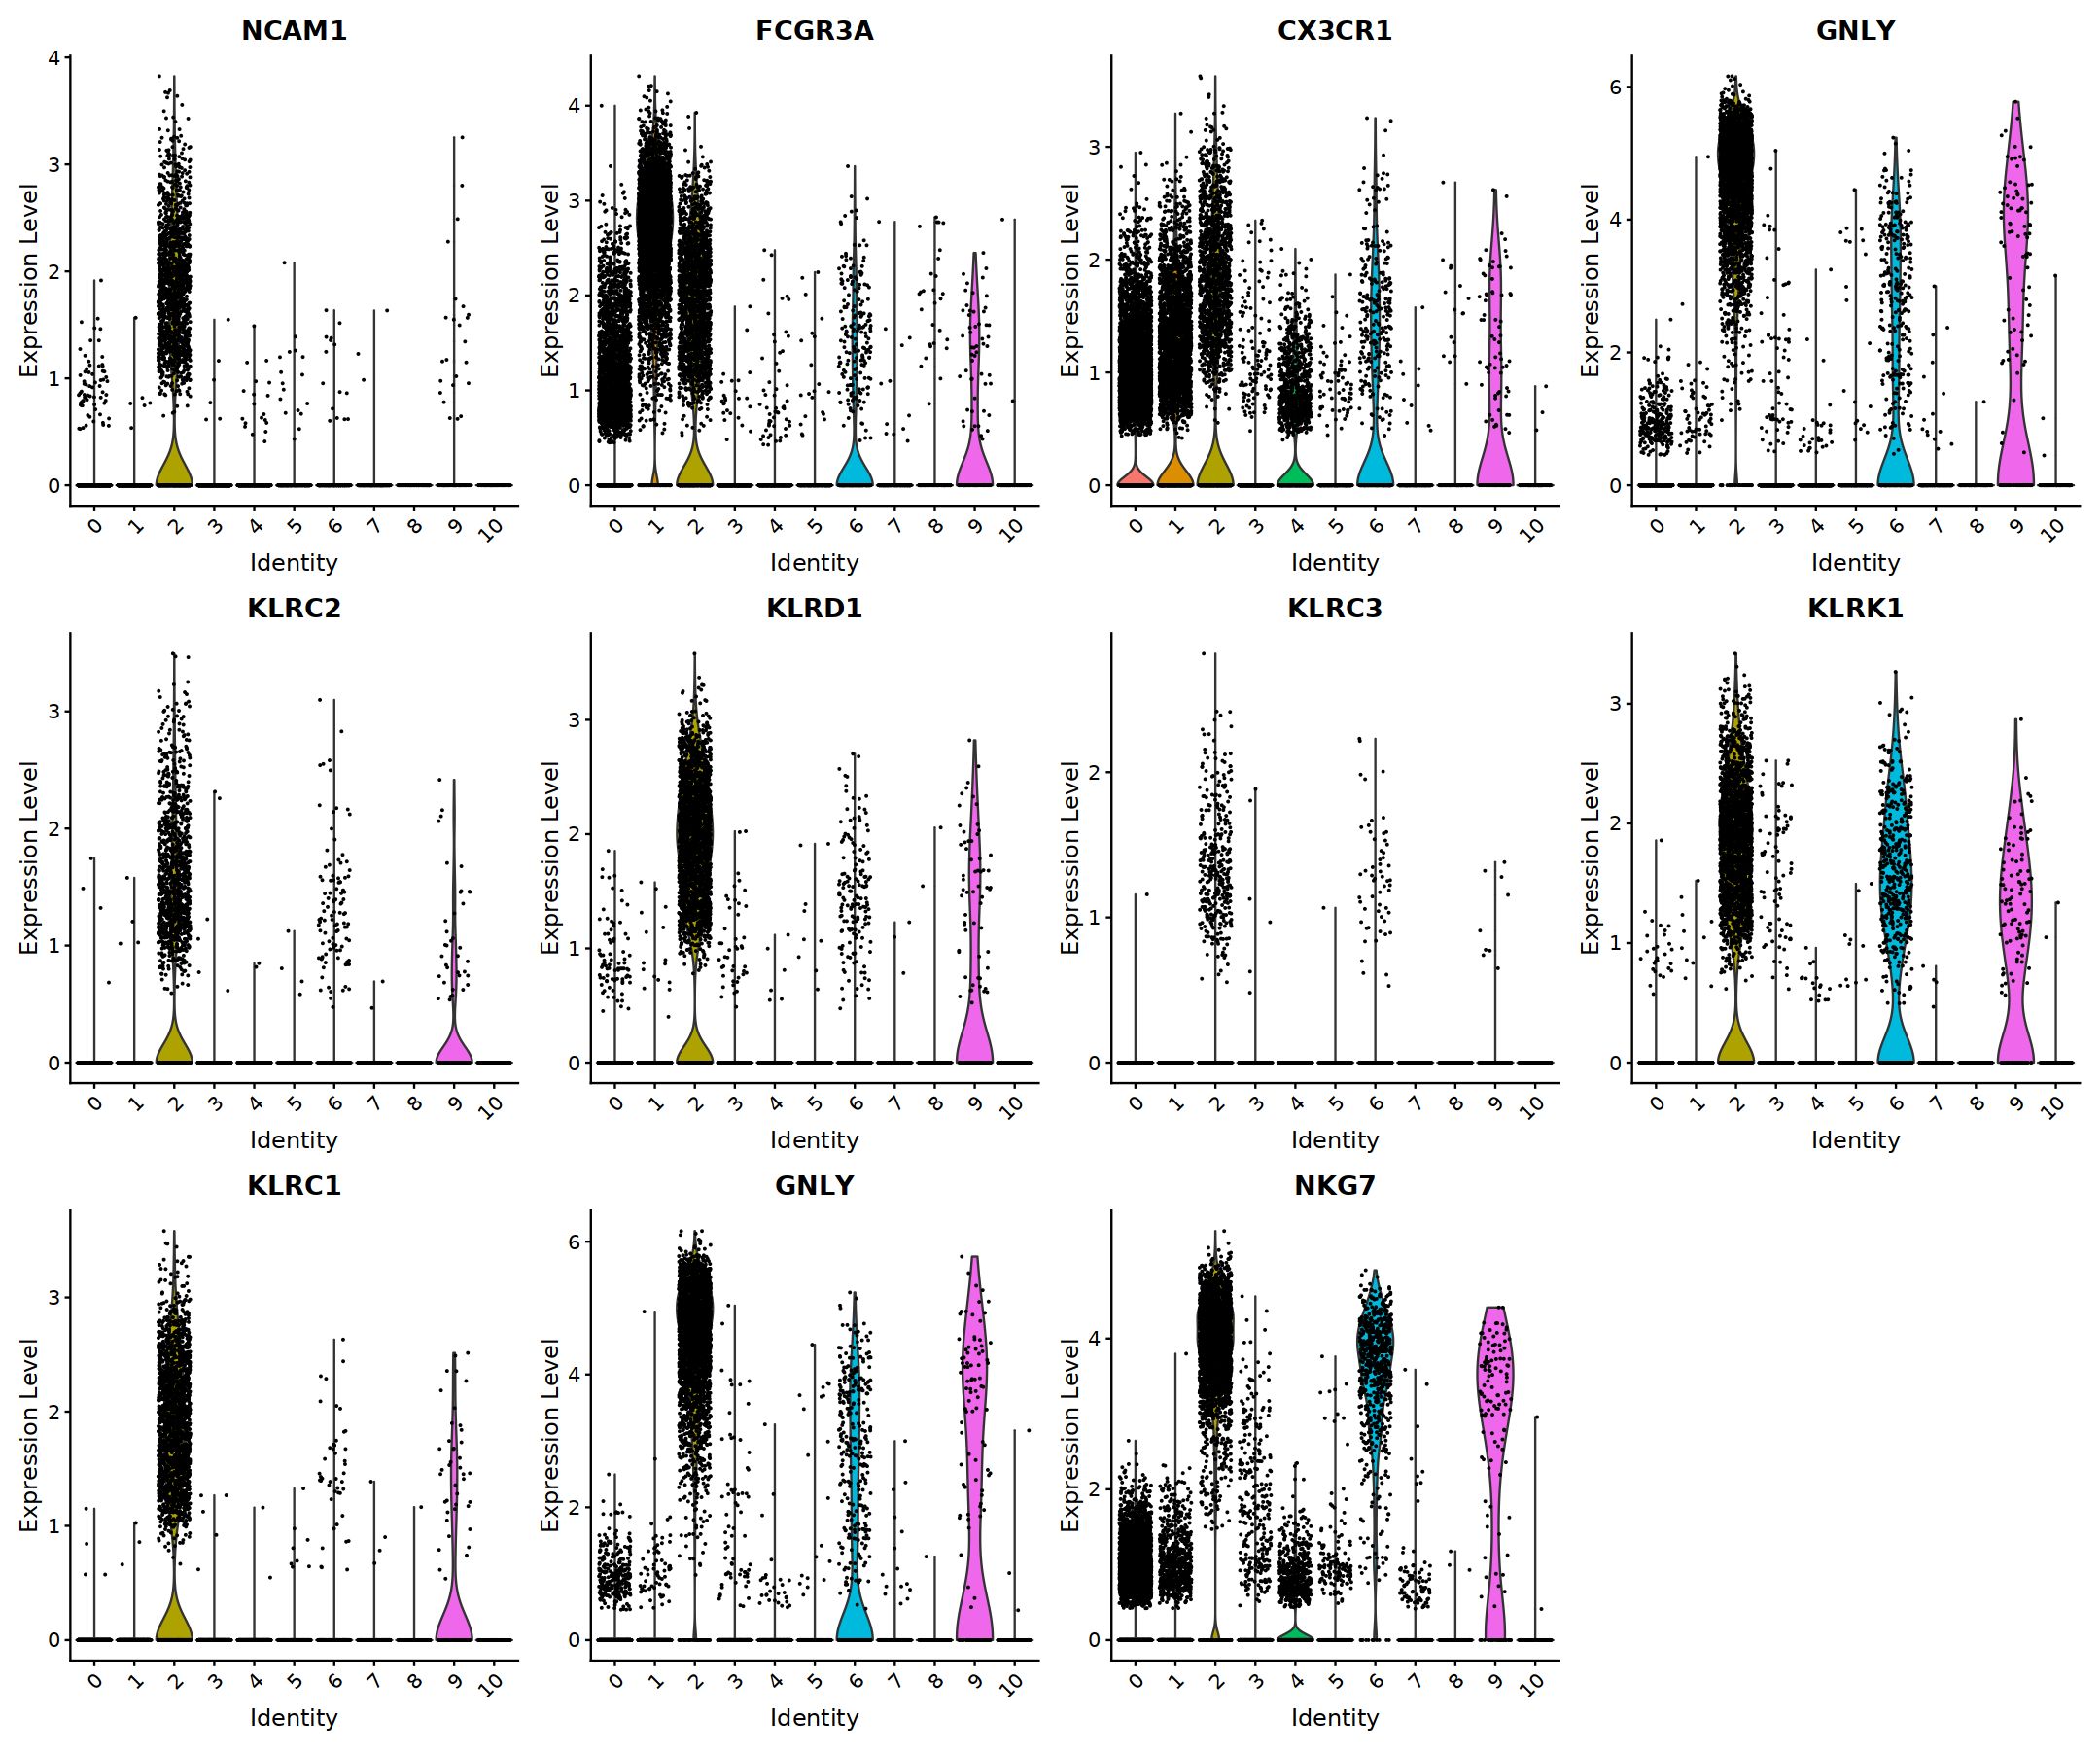

In [10]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### B-cells

In [11]:
markers = c("CD19","MS4A1","CCR7", "SELL","ITGAX", "CD79A","CD79B","JCHAIN","IGHA1")

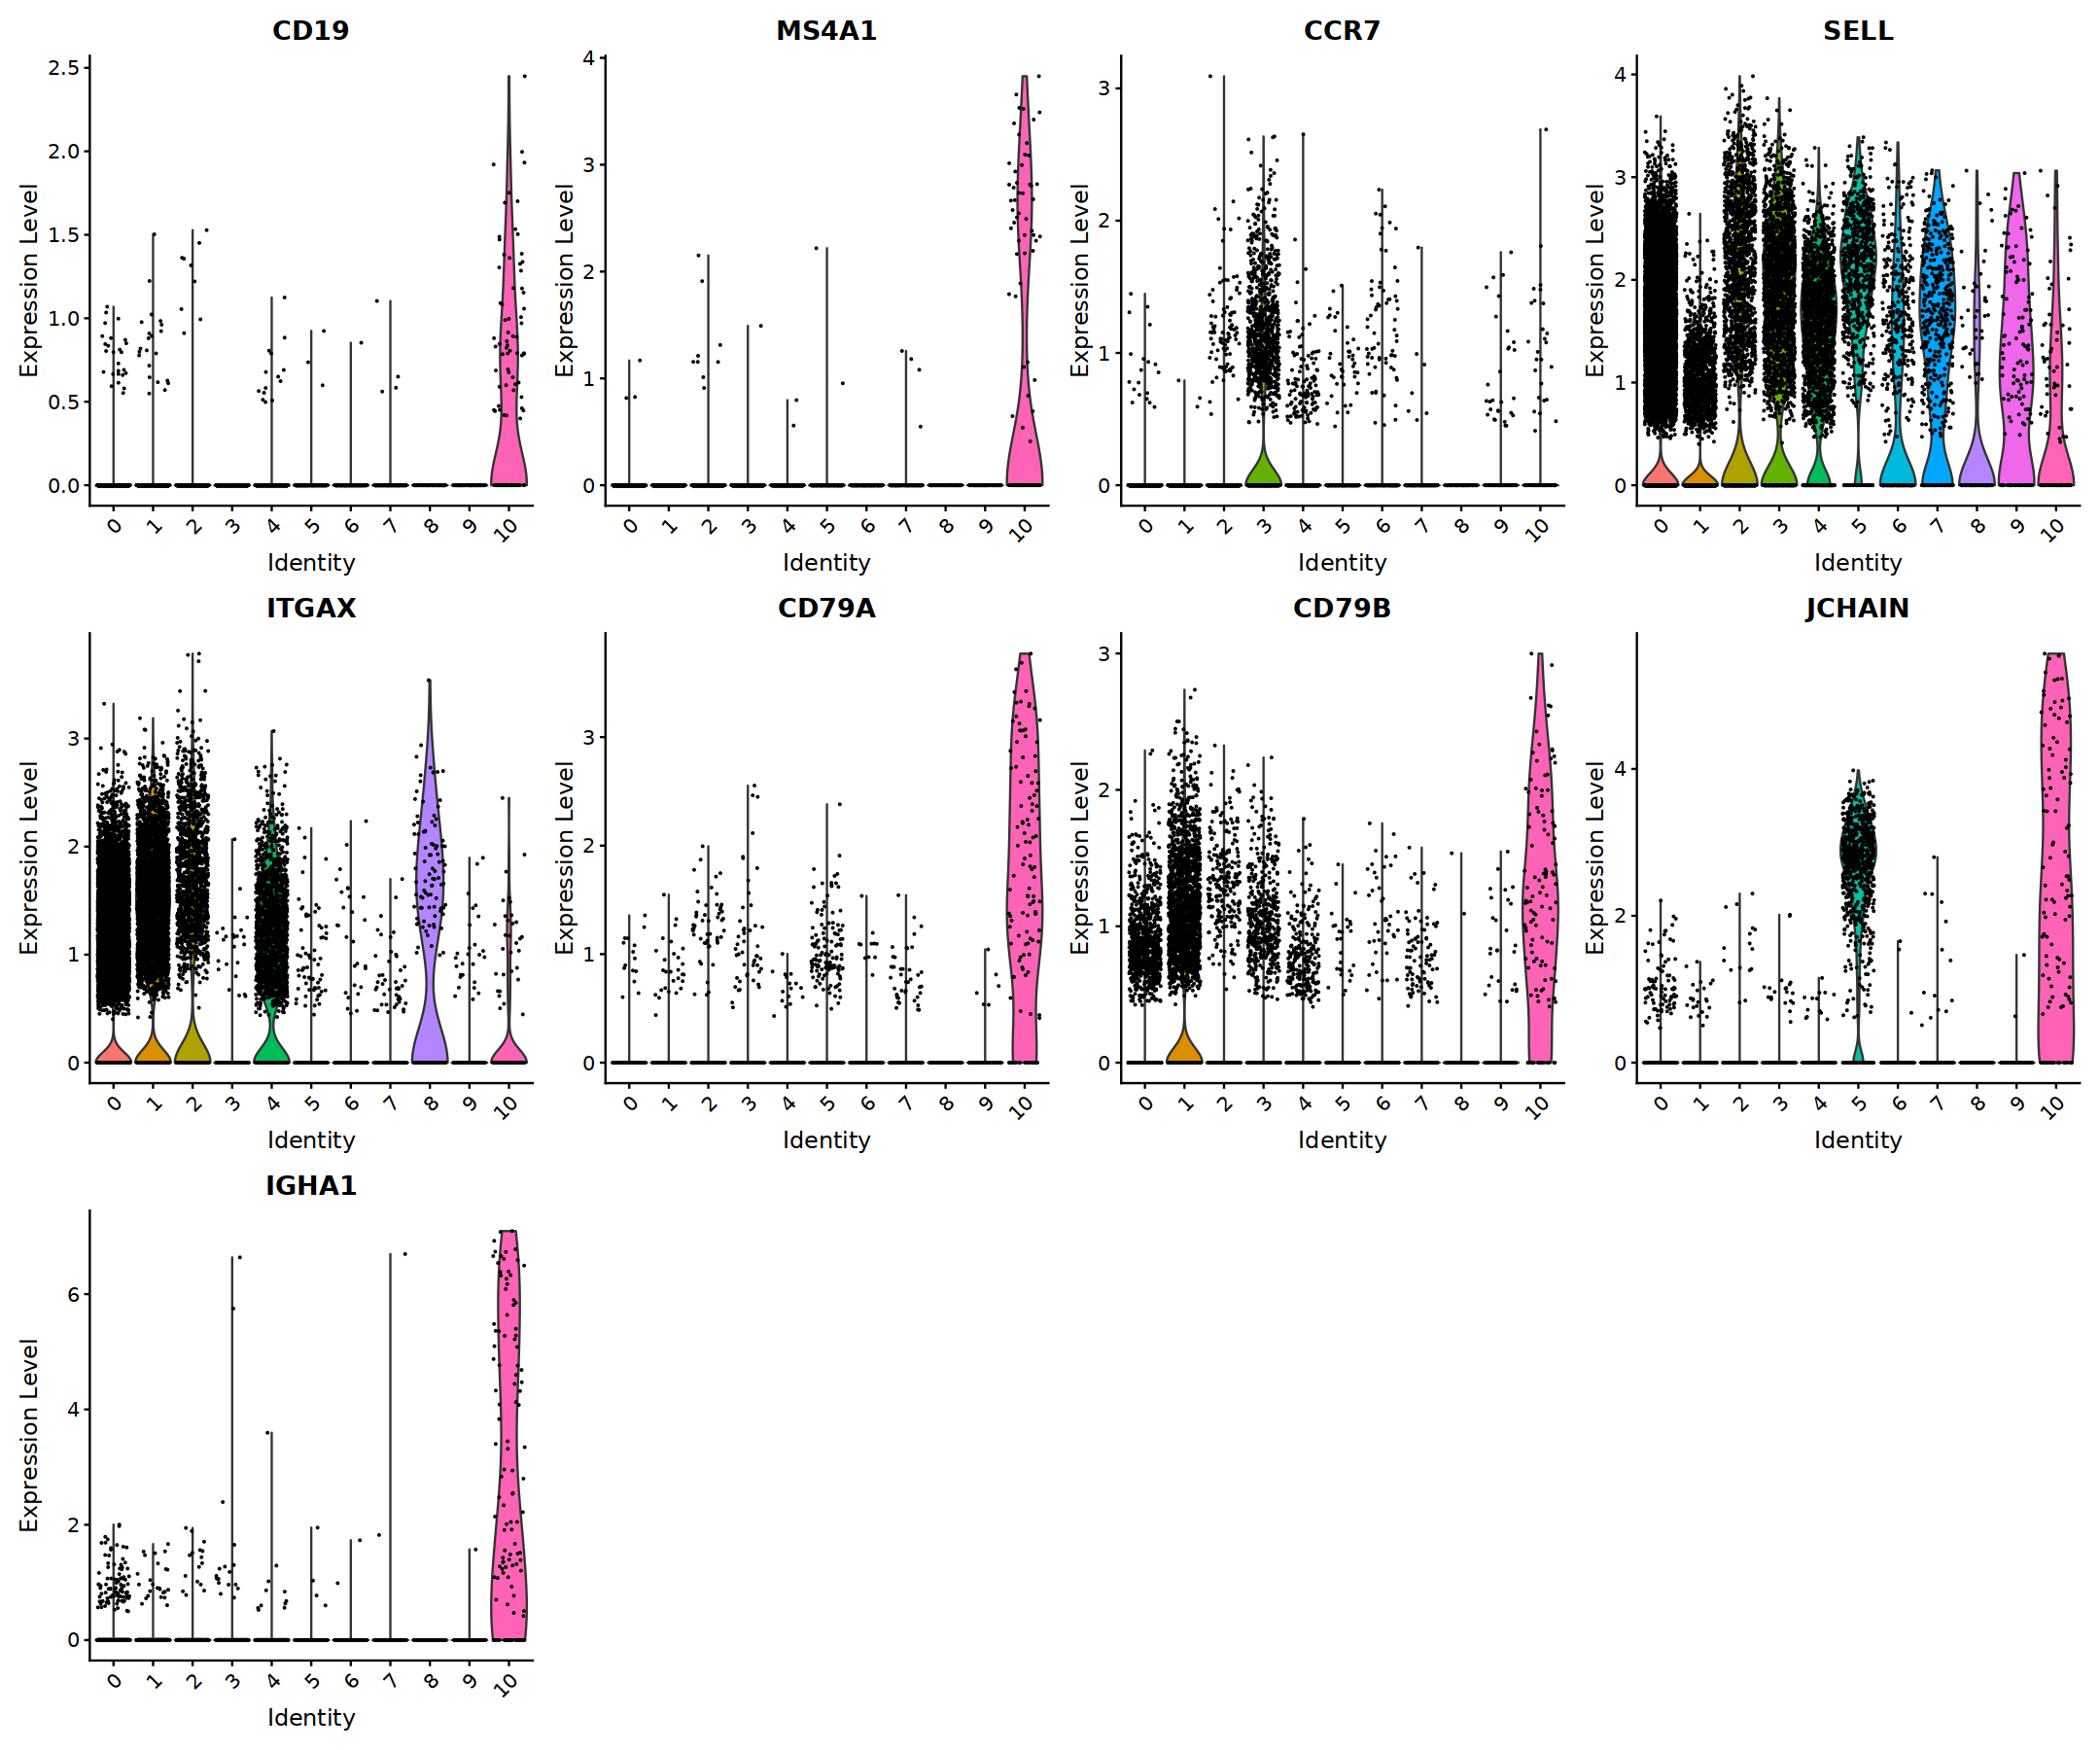

In [12]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Monocytes 

In [13]:
markers = c("CD14", "S100A8", "S100A9", "LYZ", "VCAN", "FCN1","FCGR3A", "CX3CR1", "HLA-DRB1", "HLA-DRA")

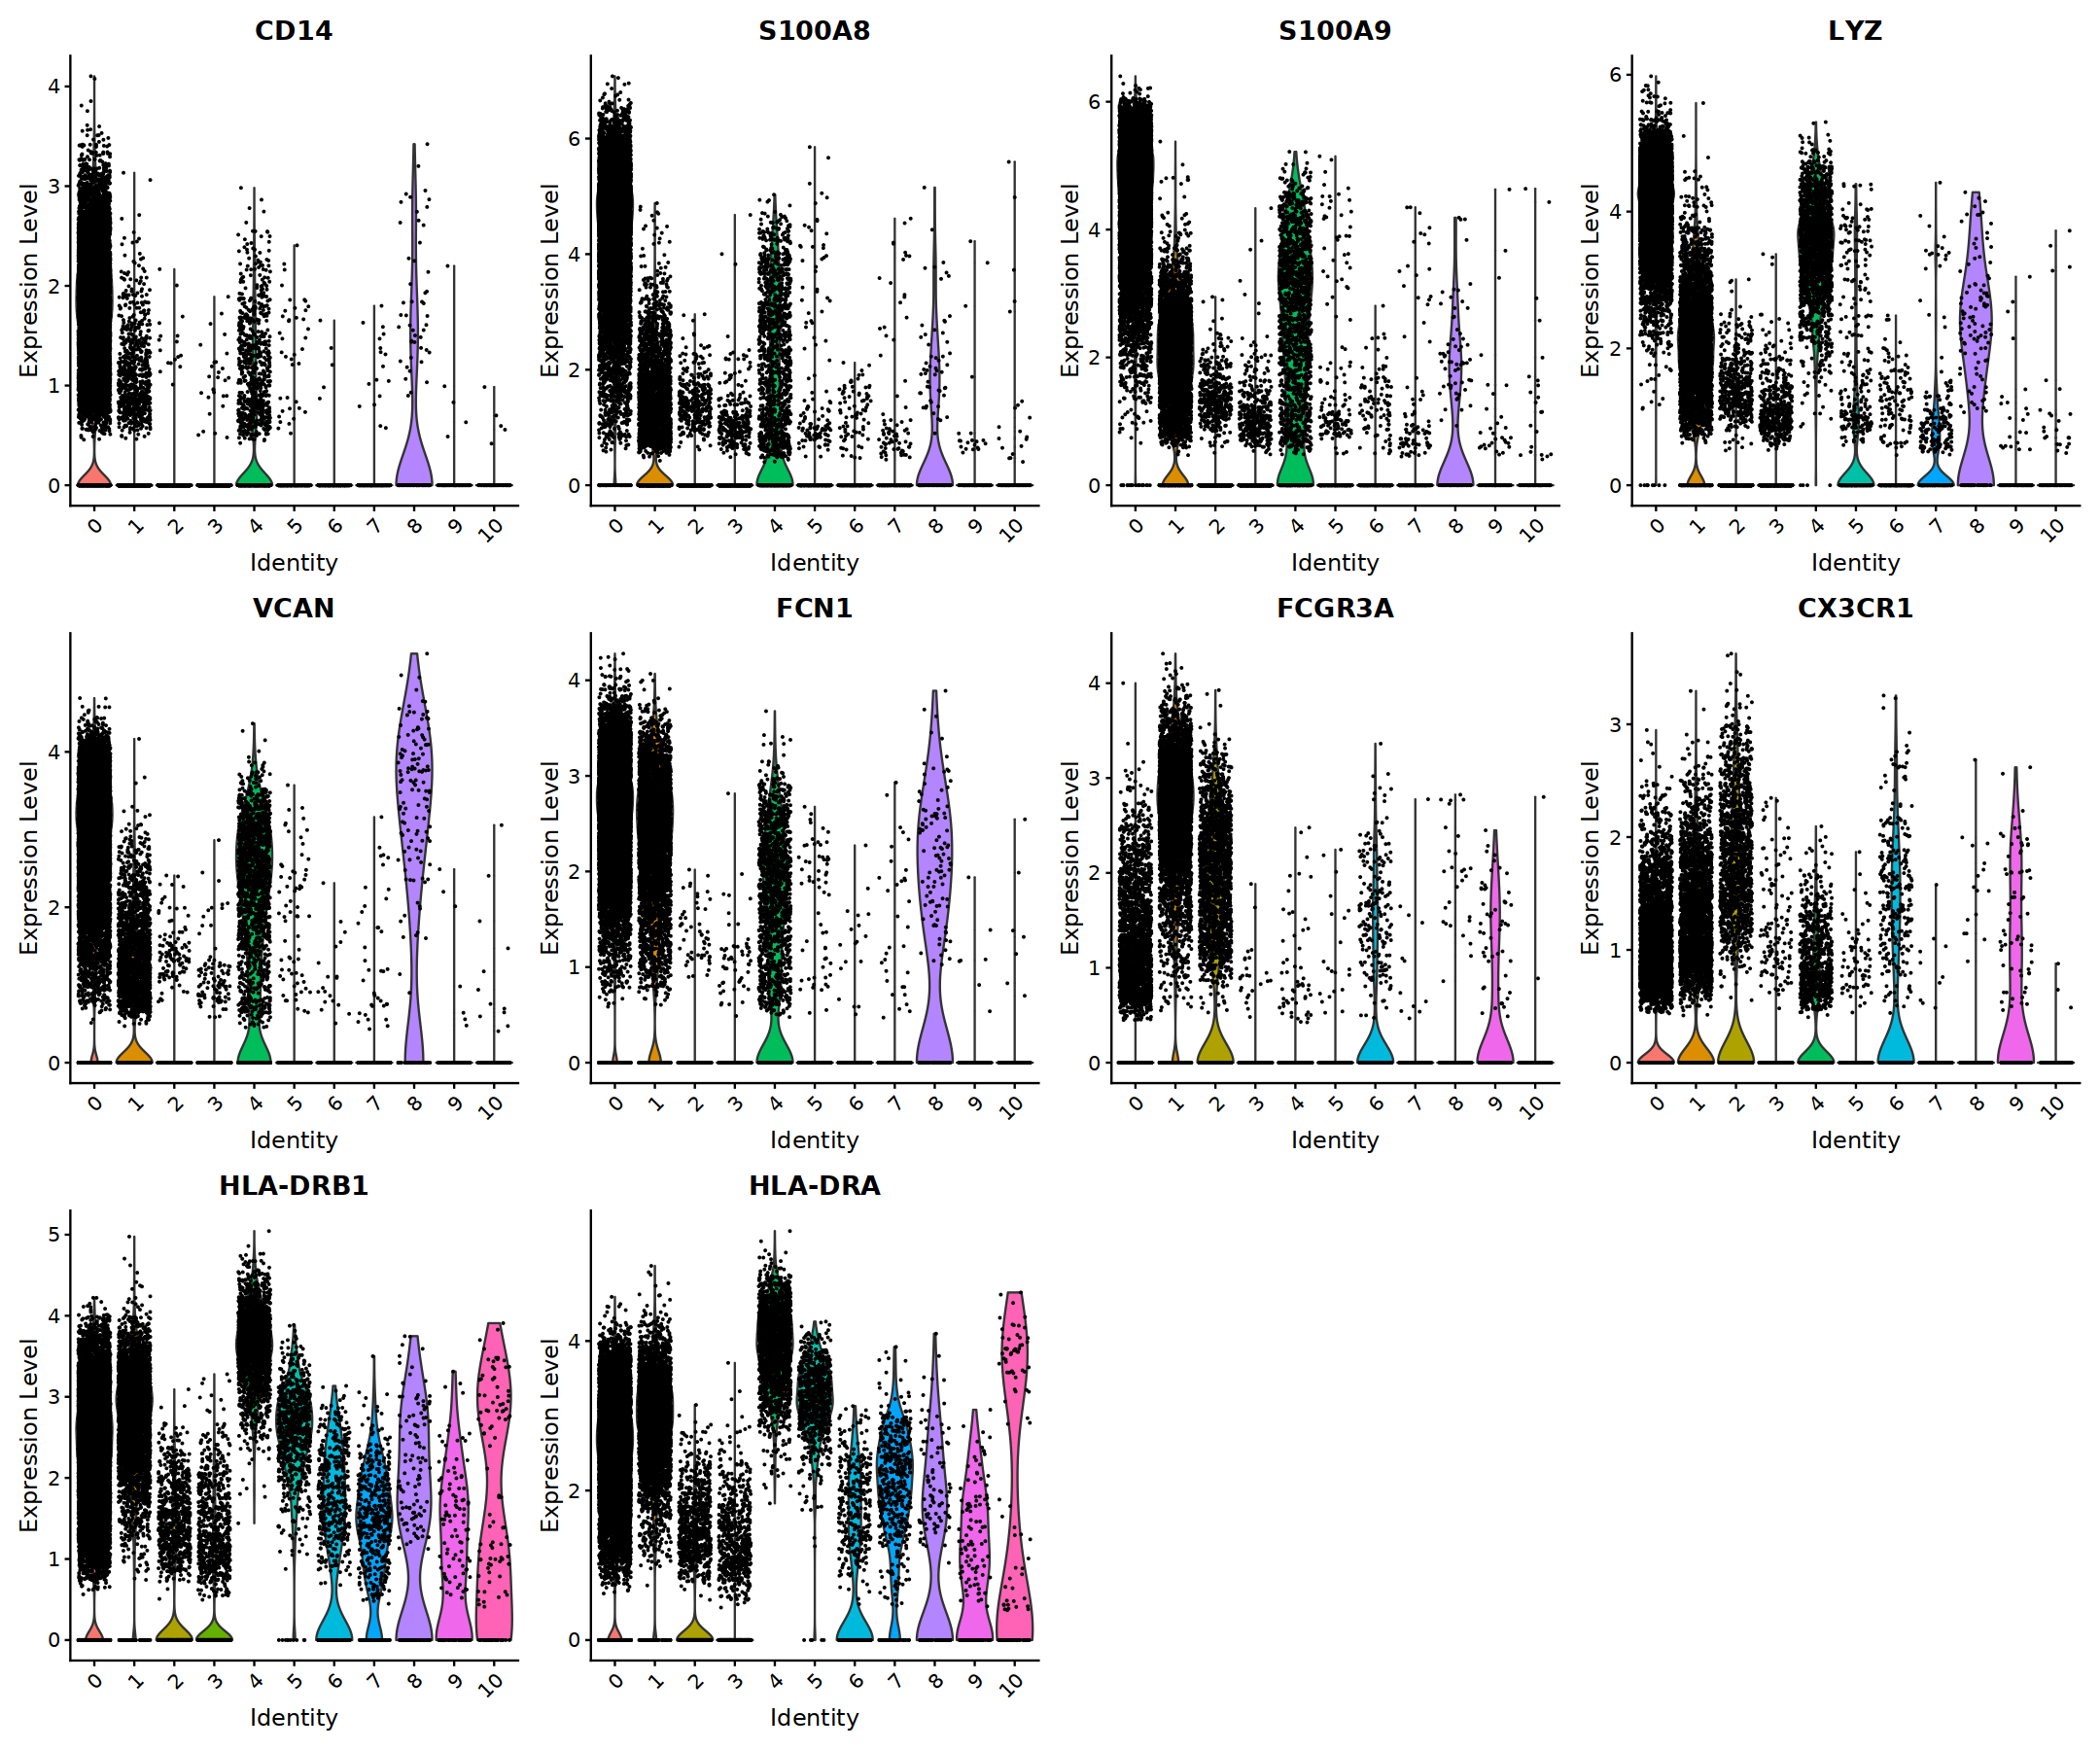

In [14]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

In [15]:
c <- 8
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene    
1  3.443401e-72 2.588615   0.968 0.625 1.002305e-67 8       SLC8A1  
2  9.128107e-65 2.529512   0.968 0.776 2.657009e-60 8       ARHGAP26
3  9.202523e-48 2.467604   0.841 0.527 2.678670e-43 8       LRMDA   
4  3.158789e-47 2.422865   0.930 0.761 9.194603e-43 8       JARID2  
5  1.007175e-72 2.307137   0.975 0.827 2.931685e-68 8       DPYD    
6  7.314814e-75 2.305020   1.000 0.902 2.129196e-70 8       NEAT1   
7  3.271528e-46 2.286628   0.822 0.461 9.522763e-42 8       PELI2   
8  2.988112e-69 2.171783   0.987 0.860 8.697798e-65 8       ZEB2    
9  3.971473e-20 2.162456   0.580 0.346 1.156016e-15 8       PLCB1   
10 7.956045e-37 2.077389   0.783 0.460 2.315846e-32 8       SMAD3   
11 2.771043e-61 2.072301   0.917 0.597 8.065951e-57 8       DENND1A 
12 1.300772e-25 2.068676   0.662 0.415 3.786286e-21 8       TRPS1   
13 9.361165e-55 2.050245   0.924 0.669 2.724848e-50 8       ETV6    
14 6.920931e-37 2.048728   0.847 0.679 2.014545e-32 8       RUNX1   
15 5.305195e-53 2.035311   0.949 0.778 1.544236e-48 8       ATP2B1  
16 1.647778e-42 2.006559   0.841 0.582 4.796353e-38 8       SLCO3A1 
17 4.072523e-43 1.973144   0.892 0.697 1.185430e-38 8       GPCPD1  
18 1.780420e-47 1.970800   0.962 0.781 5.182447e-43 8       NAMPT   
19 2.792845e-45 1.967144   0.873 0.635 8.129414e-41 8       TLE4    
20 1.902496e-48 1.944203   0.917 0.655 5.537787e-44 8       RBM47

#### Dendritic cells

In [16]:
markers = c("CLEC9A", "XCR1", "IDO1","FCER1A", "CLEC10A","ITGAX","SIGLEC6","IL3RA","JCHAIN")

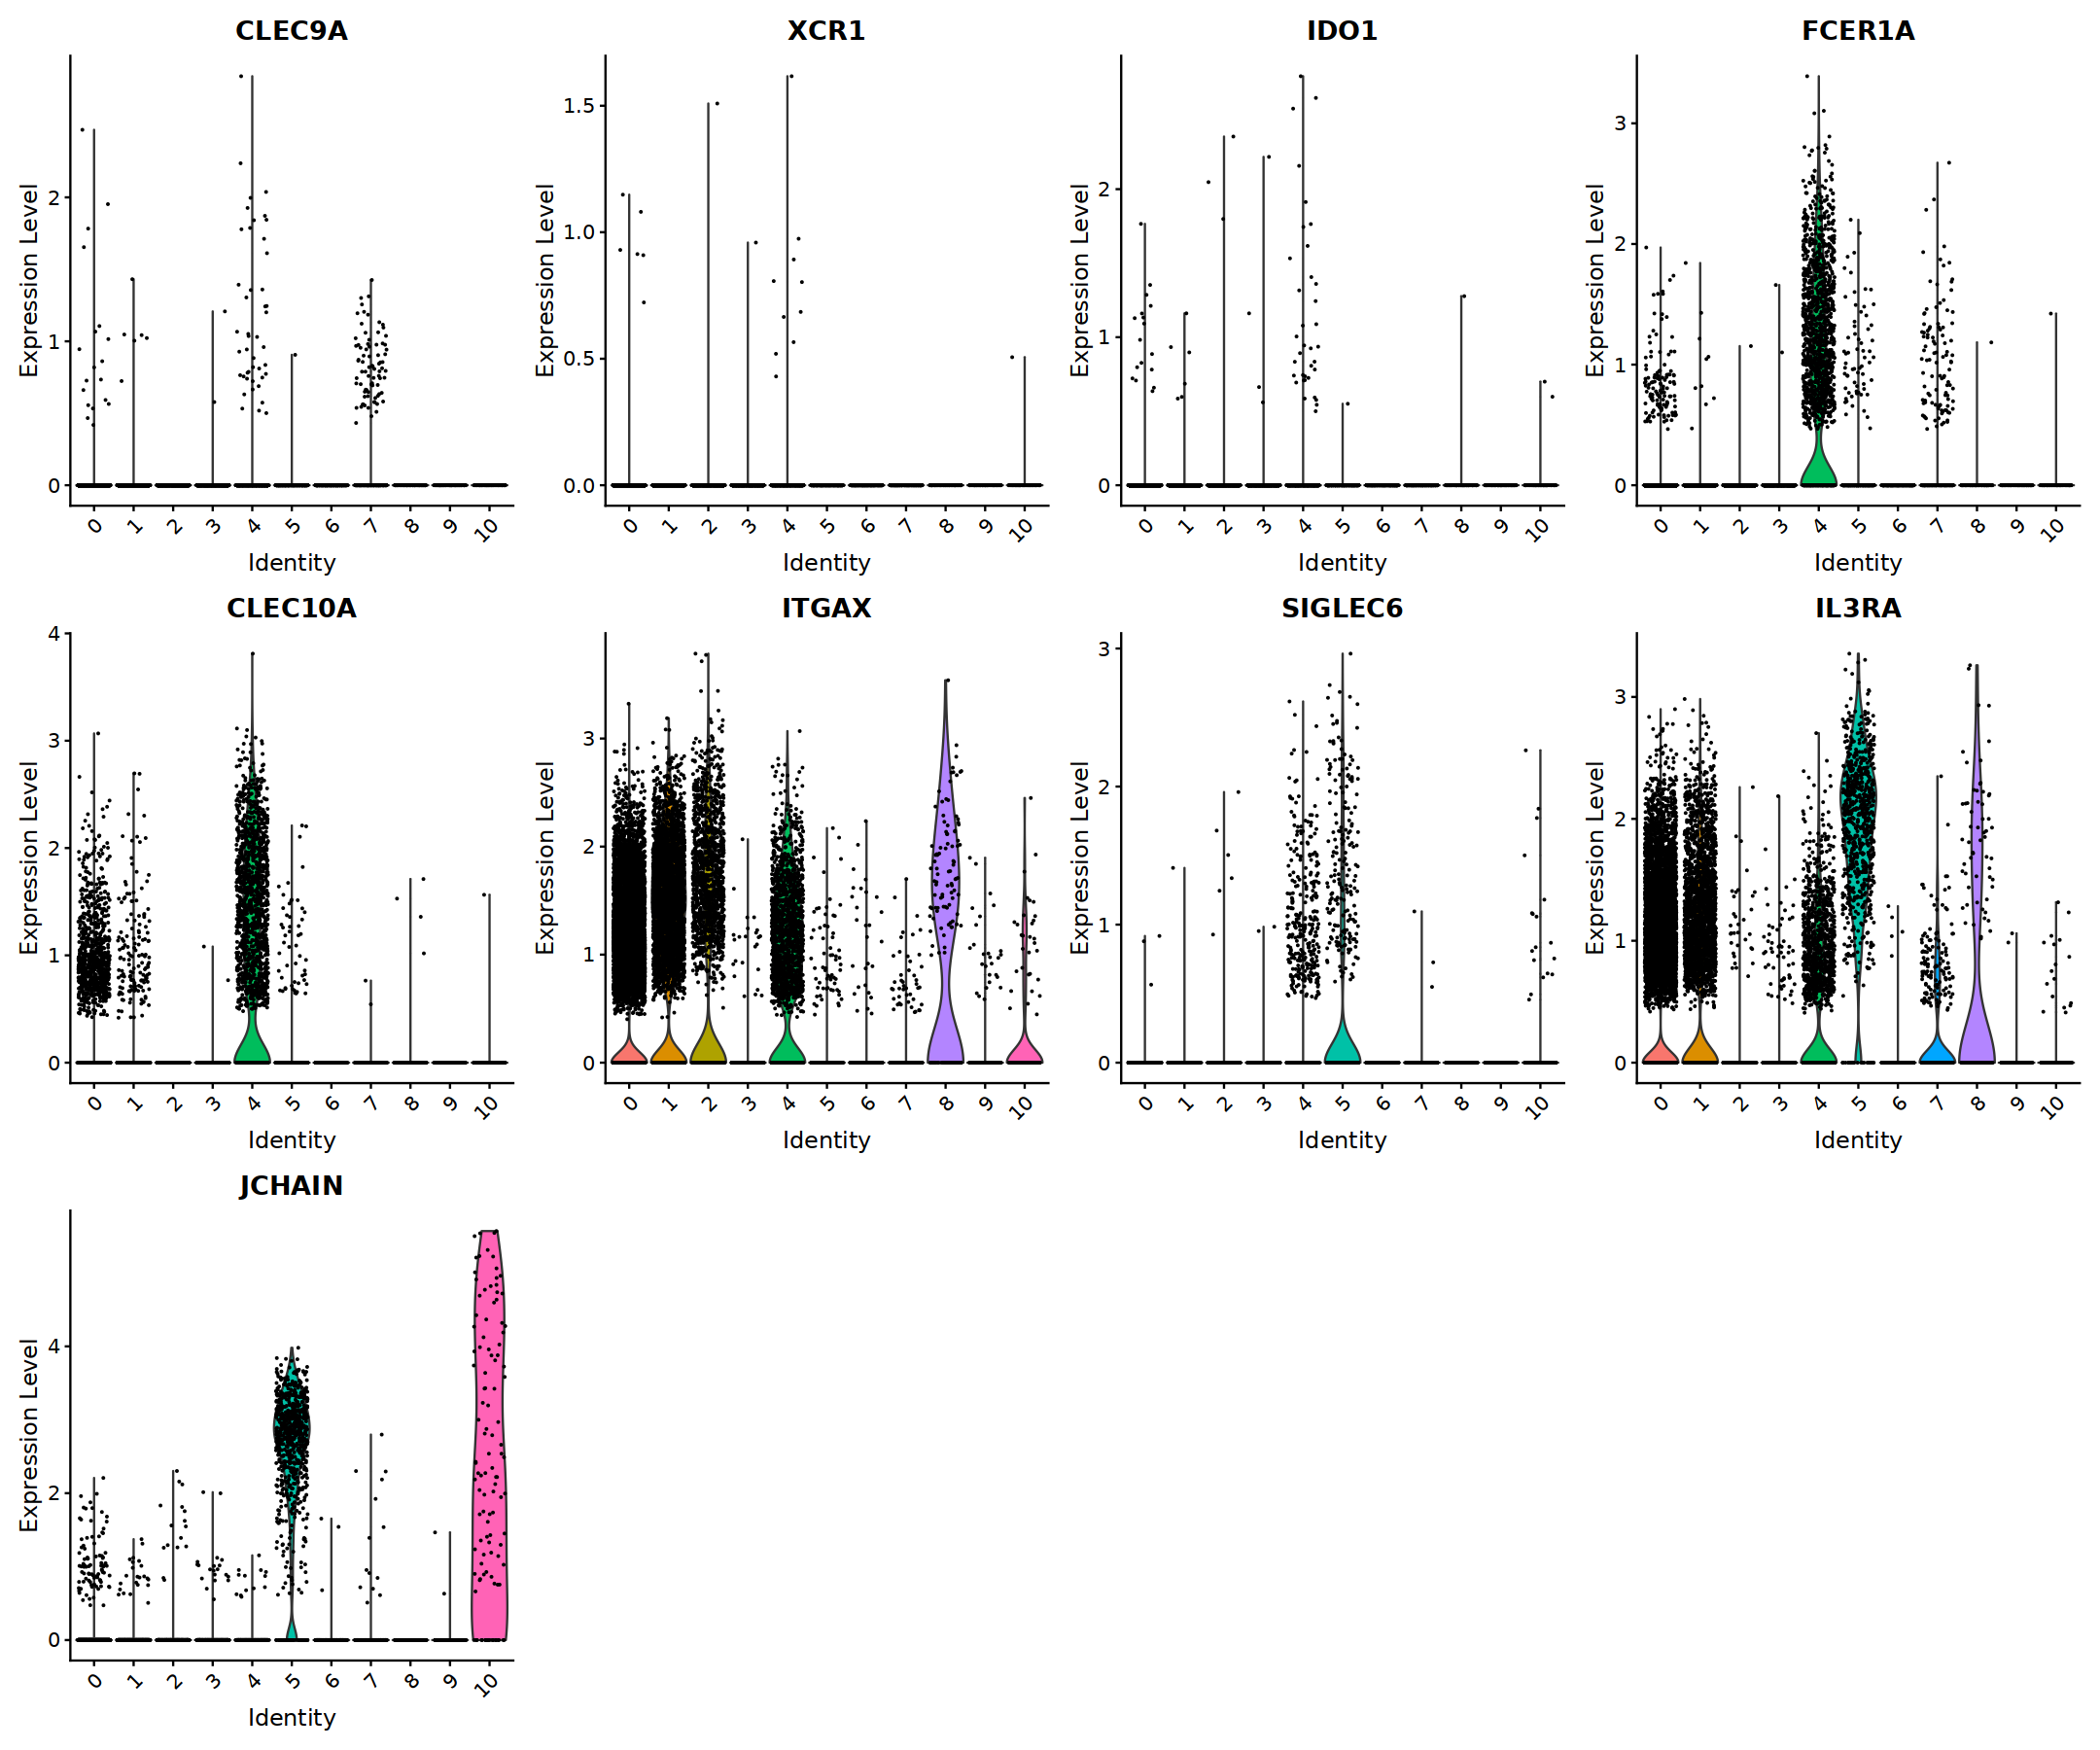

In [17]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

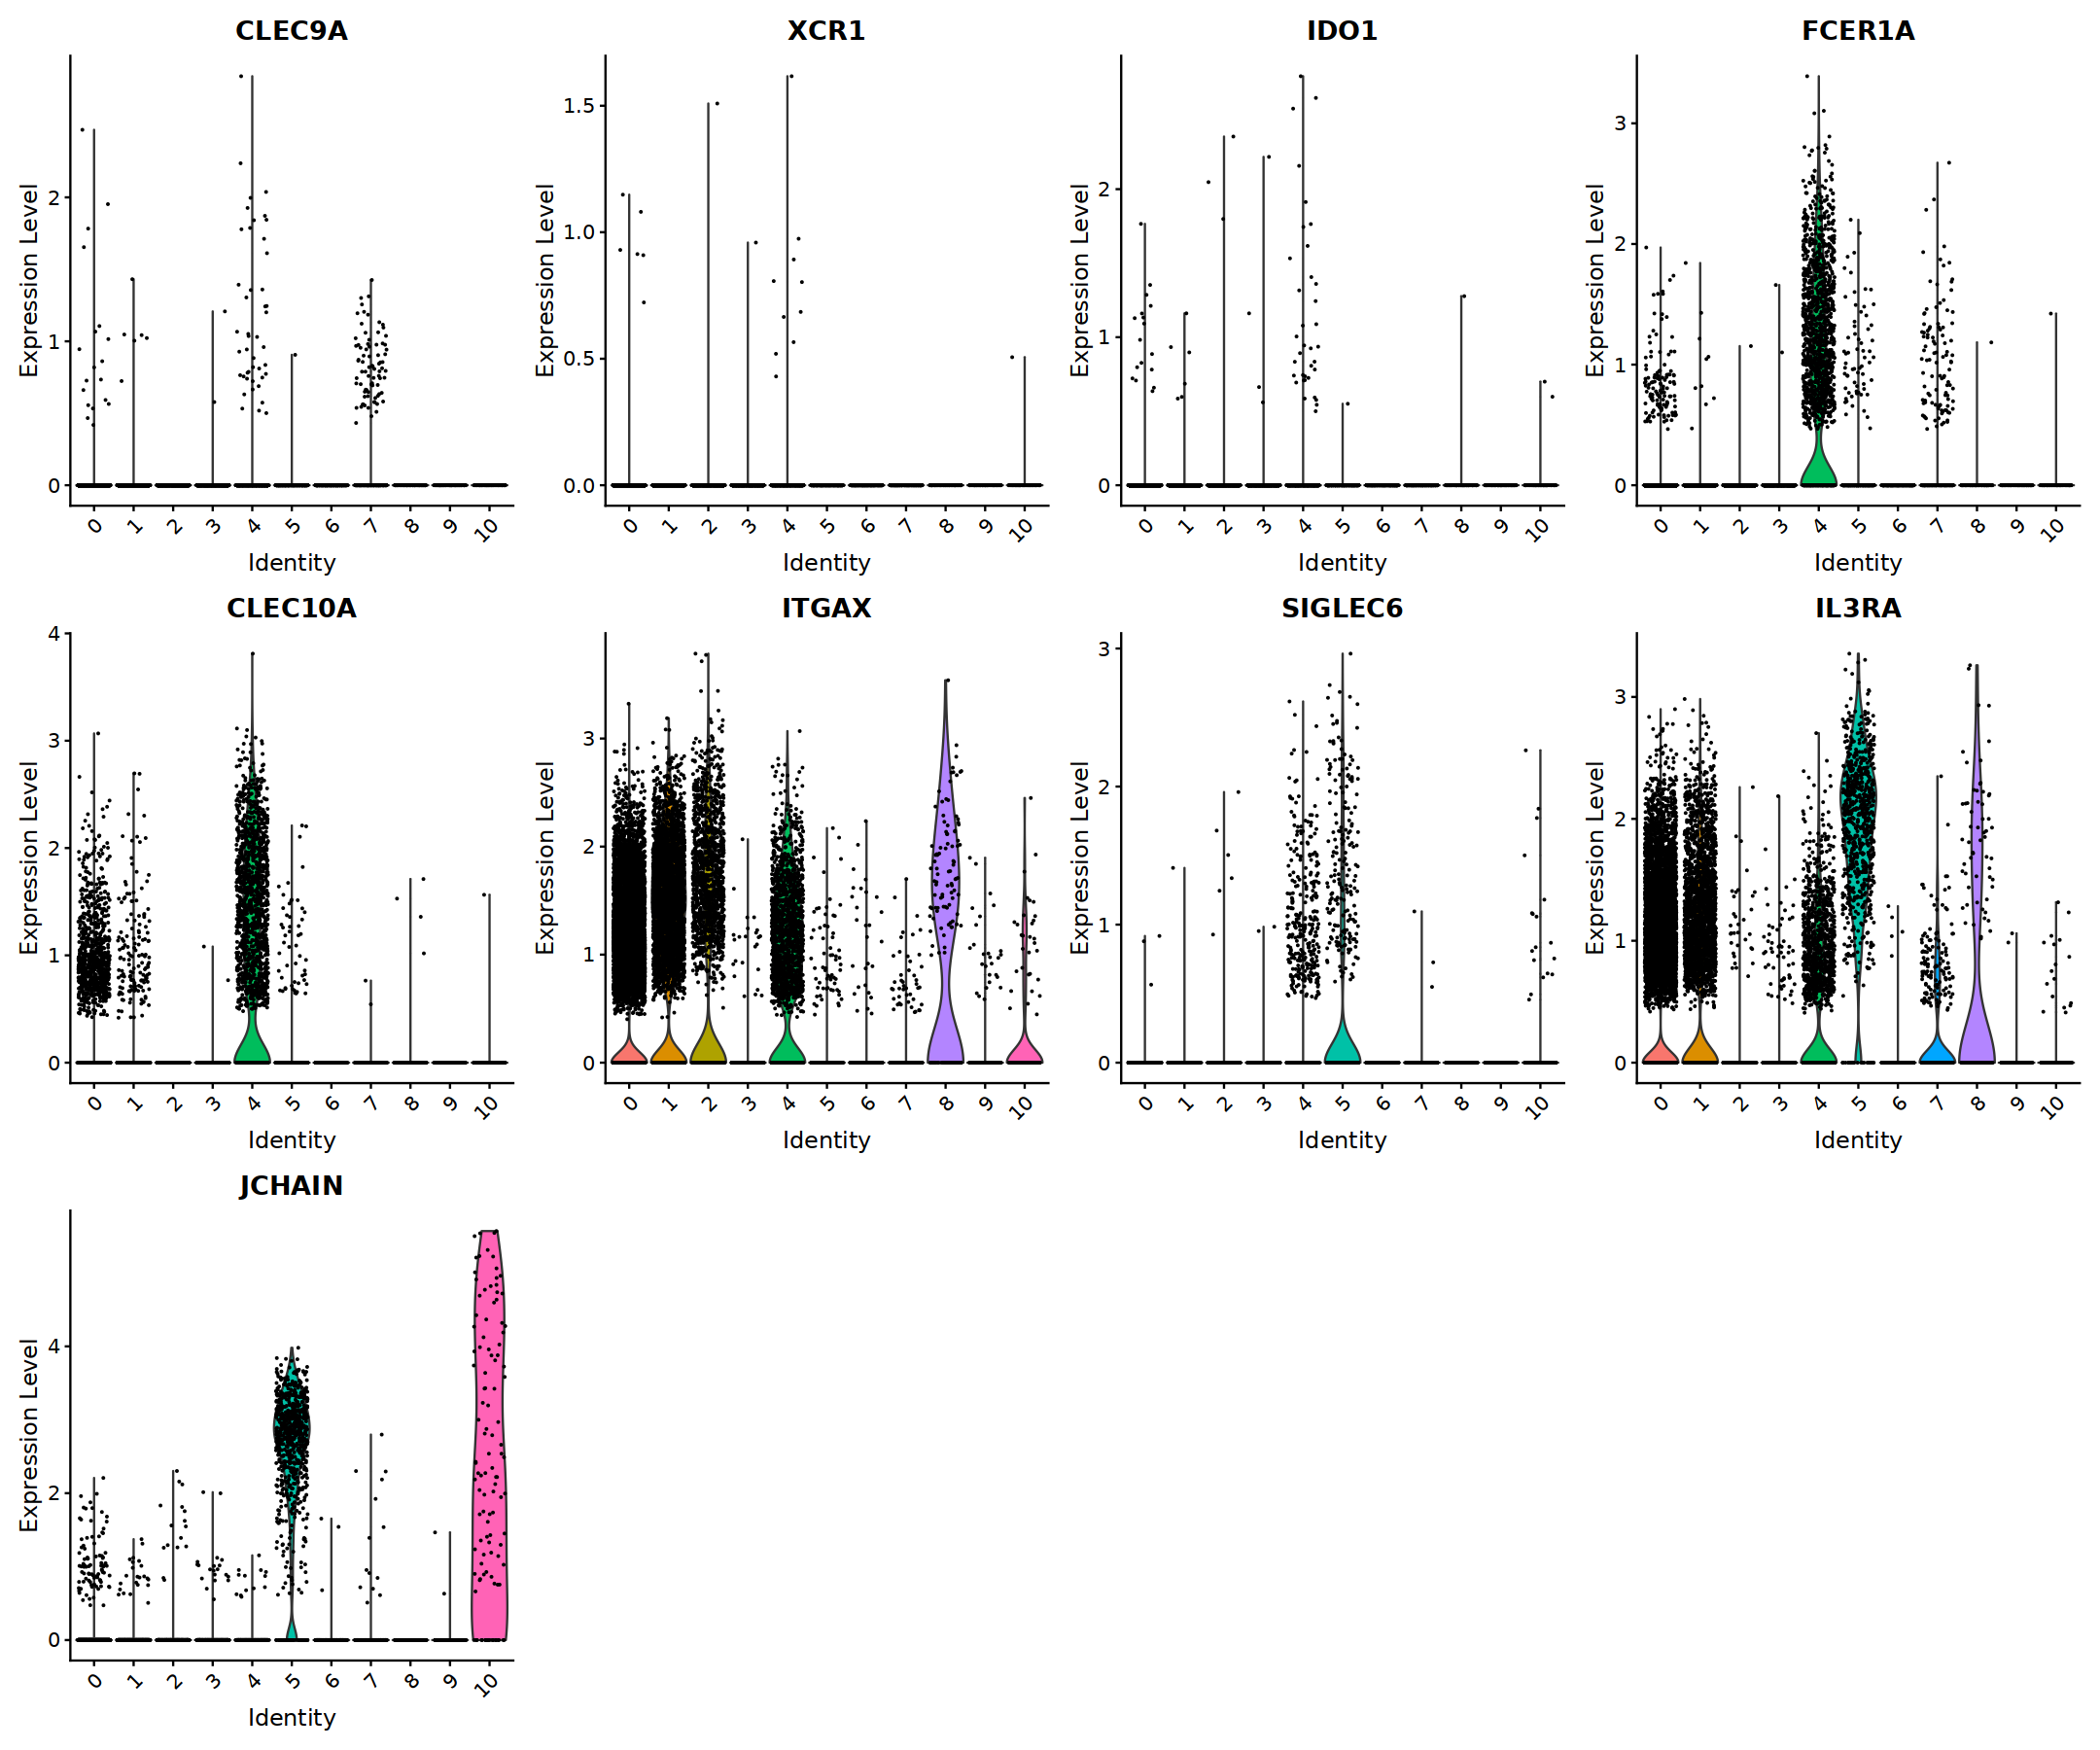

In [18]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

## Renaming

In [19]:
rename_clusters= list("0"="Monocytes",
                      "1"="Monocytes non-classical",
                      "2"="NK", 
                      "3"="CD4 T-cells", 
                      "4"="Dendritic cells",
                      "5"="Mast cells",
                      "6"="CD8 T-cells",
                      "7"="HSC",
                      "8"="Monocytes",
                      "9"= "Proliferative cells",
                      "10"="Plasma cells")
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

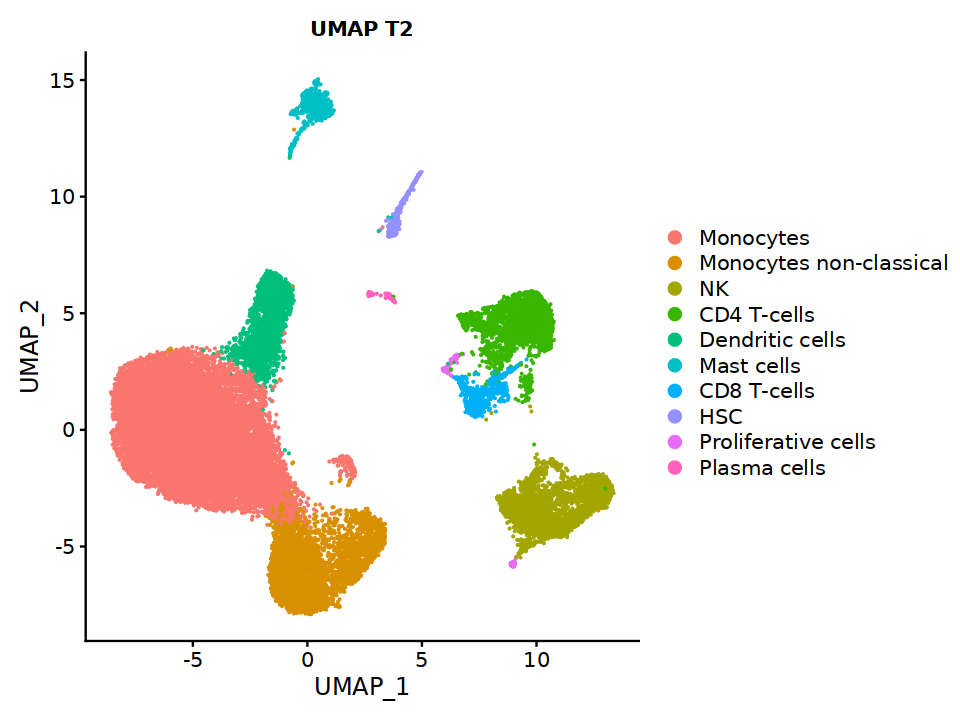

In [20]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

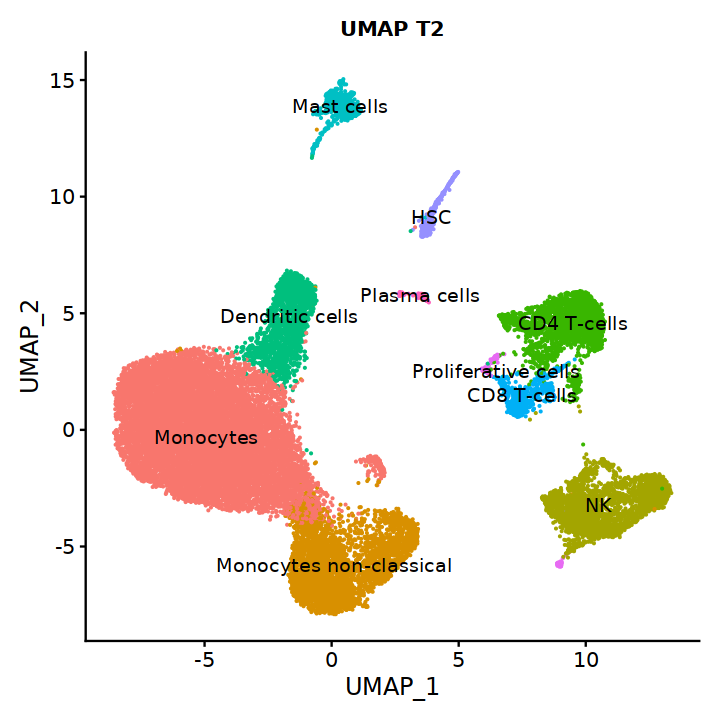

In [21]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## Save

In [22]:
saveRDS(seurat_obj, here::here(glue::glue("{annot}/{robj_dir}/4.0-l1_all_{timepoint}.rds")))

## Session Info

In [23]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0      dplyr_1.1.3       
 [5] purrr_1.0.2        readr_2.1.4        tidyr_1.3.0        tibble_3.2.1      
 [9] ggplot2_3.4.4      tidyverse_2.0.0    glue_1.6.2         here_1.0.1        
[13] SeuratObject_4.1.4 Seurat_4.0.5  